# READ MODIS

In [1]:
import numpy as np
import pandas as pd
import xarray as xr
import glob


In [2]:
#function to add TIME dimension to MODIS data:
"""
Months={'01':'Jan','02':'Feb',
       '03':'Mar','04':'Apr',
       '05':'May','06':'Jun',
       '07':'Jul','08':'Aug',
       '09':'Sep','10':'Oct',
       '11':'Nov','12':'Dec',}

PARclimatology = []
for dataset in range(len(TempNCDFfiles)):
    PARclimatology.append(xr.open_dataset(TempNCDFfiles[dataset]))
    print(Months.get(PARclimatology[dataset].time_coverage_start[5:7]))
    PARclimatology[dataset] = PARclimatology[dataset].assign_coords(time=int(PARclimatology[dataset].time_coverage_start[5:7]))
    PARclimatology[dataset] = PARclimatology[dataset].expand_dims('time')
    PARclimatology[dataset].to_netcdf(path='MODIS/PARMonthlyClimatology/modified/PAR_Climatology_'+Months.get(PARclimatology[dataset].time_coverage_start[5:7])+'.nc')
    
"""


"\nMonths={'01':'Jan','02':'Feb',\n       '03':'Mar','04':'Apr',\n       '05':'May','06':'Jun',\n       '07':'Jul','08':'Aug',\n       '09':'Sep','10':'Oct',\n       '11':'Nov','12':'Dec',}\n\nPARclimatology = []\nfor dataset in range(len(TempNCDFfiles)):\n    PARclimatology.append(xr.open_dataset(TempNCDFfiles[dataset]))\n    print(Months.get(PARclimatology[dataset].time_coverage_start[5:7]))\n    PARclimatology[dataset] = PARclimatology[dataset].assign_coords(time=int(PARclimatology[dataset].time_coverage_start[5:7]))\n    PARclimatology[dataset] = PARclimatology[dataset].expand_dims('time')\n    PARclimatology[dataset].to_netcdf(path='MODIS/PARMonthlyClimatology/modified/PAR_Climatology_'+Months.get(PARclimatology[dataset].time_coverage_start[5:7])+'.nc')\n    \n"

In [3]:
TempNCDFfiles2 = glob.glob('MODIS/PARMonthlyClimatology/modified/*.nc', recursive=True)
MODIS2 = xr.open_mfdataset(TempNCDFfiles2,combine='by_coords')

In [4]:
MODIS2

<xarray.Dataset>
Dimensions:  (eightbitcolor: 256, lat: 2160, lon: 4320, rgb: 3, time: 12)
Coordinates:
  * lat      (lat) float32 89.958336 89.875 89.79167 ... -89.87501 -89.958336
  * lon      (lon) float32 -179.95833 -179.875 ... 179.87502 179.95836
  * time     (time) int64 1 2 3 4 5 6 7 8 9 10 11 12
Dimensions without coordinates: eightbitcolor, rgb
Data variables:
    par      (time, lat, lon) float32 dask.array<chunksize=(1, 2160, 4320), meta=np.ndarray>
    palette  (time, rgb, eightbitcolor) uint8 dask.array<chunksize=(1, 3, 256), meta=np.ndarray>
Attributes:
    product_name:                      A20023352018365.L3m_MC_PAR_par_9km.nc
    instrument:                        MODIS
    title:                             MODISA Level-3 Standard Mapped Image
    project:                           Ocean Biology Processing Group (NASA/G...
    platform:                          Aqua
    temporal_range:                    16-year
    processing_version:                2018.0
    date_

In [5]:
MODIS2X = MODIS2.drop_dims(['eightbitcolor','rgb'])
MODIS_df = MODIS2X.sel(lat=40,lon=-20, method='nearest').to_dataframe()
MODIS_df#.to_csv('../PAR40minus20.csv')

,lat,lon,par
time,,,
1,40.041664,-20.041662,13.993996
2,40.041664,-20.041662,21.263996
3,40.041664,-20.041662,29.809998
4,40.041664,-20.041662,39.133999
5,40.041664,-20.041662,46.703999
6,40.041664,-20.041662,51.225998
7,40.041664,-20.041662,51.562000
8,40.041664,-20.041662,47.174000
9,40.041664,-20.041662,36.867996


In [6]:
MODIS2X.to_netcdf('PARclimatology_MODISaqua_L3.nc')

In [42]:
Lat = np.array(MODIS2X['lat'])
Lon = np.array(MODIS2X['lon'])
PAR = np.array(MODIS2X['par'])

In [43]:
Lats,Lons = np.meshgrid(Lat,Lon,indexing='ij')

In [11]:
MODIS_df['lat'].values

array([40.041664, 40.041664, 40.041664, 40.041664, 40.041664, 40.041664,
       40.041664, 40.041664, 40.041664, 40.041664, 40.041664, 40.041664],
      dtype=float32)

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

import os
os.environ['PROJ_LIB'] = r'/Users/bpo/anaconda/anaconda3/pkgs/proj4-5.2.0-h0a44026_1/share/proj'

from mpl_toolkits.basemap import Basemap

In [2]:
import matplotlib.cm as cm
import matplotlib as mpl

/Users/bpo/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Global PAR from MODIS aqua - July')

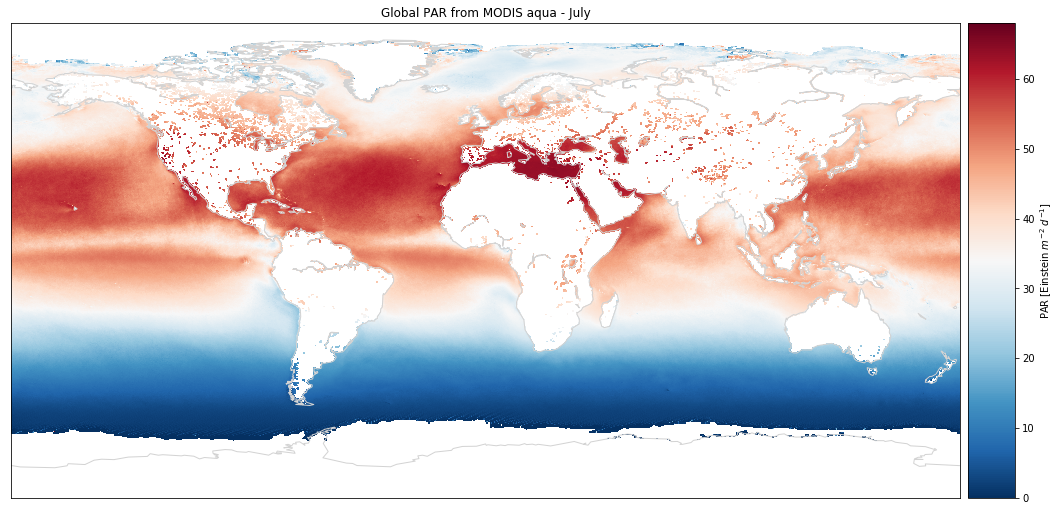

In [33]:
fig = plt.figure(figsize=(18, 16), edgecolor='w')
m = Basemap(projection='cyl',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
#m.shadedrelief(scale=0.5)
m.pcolormesh(Lons, Lats, PAR[6], latlon=True, cmap='RdBu_r')

#lat = 50
#lon = -70
#x,y = m(lon, lat)
#m.plot(x, y, 'bo', markersize=24)

m.drawcoastlines(color='lightgray')

norm = mpl.colors.Normalize(vmin=np.nanmin(PAR), vmax=np.nanmax(PAR))
sm = cm.ScalarMappable(norm=norm, cmap='RdBu_r')
#sm.set_array([]) # can be an empty list, only needed for matplotlib < 3.1
# ...
m.colorbar(sm, pad=0.1, label='PAR [Einstein $m^{-2}$ $d^{-1}$]')
plt.title('Global PAR from MODIS aqua - July')

In [34]:
fig.savefig('PLOTS_01/01_PAR_MODIS_July.png')

In [22]:
np.nanmax(PAR)

68.026

In [23]:
np.nanmin(PAR)

0.0

In [41]:
TempNCDFfiles

['MODIS/ChlAMonthlyClimatology/A20023052018334.L3m_MC_CHL_chlor_a_9km.nc',
 'MODIS/ChlAMonthlyClimatology/A20030912019120.L3m_MC_CHL_chlor_a_9km.nc',
 'MODIS/ChlAMonthlyClimatology/A20030012019031.L3m_MC_CHL_chlor_a_9km.nc',
 'MODIS/ChlAMonthlyClimatology/A20031212019151.L3m_MC_CHL_chlor_a_9km.nc',
 'MODIS/ChlAMonthlyClimatology/A20022132019243.L3m_MC_CHL_chlor_a_9km.nc',
 'MODIS/ChlAMonthlyClimatology/A20023352018365.L3m_MC_CHL_chlor_a_9km.nc',
 'MODIS/ChlAMonthlyClimatology/A20030322019059.L3m_MC_CHL_chlor_a_9km.nc',
 'MODIS/ChlAMonthlyClimatology/A20022442018273.L3m_MC_CHL_chlor_a_9km.nc',
 'MODIS/ChlAMonthlyClimatology/A20030602019090.L3m_MC_CHL_chlor_a_9km.nc',
 'MODIS/ChlAMonthlyClimatology/A20021822019212.L3m_MC_CHL_chlor_a_9km.nc',
 'MODIS/ChlAMonthlyClimatology/A20022742018304.L3m_MC_CHL_chlor_a_9km.nc',
 'MODIS/ChlAMonthlyClimatology/A20031522019181.L3m_MC_CHL_chlor_a_9km.nc']

In [40]:
TempNCDFfiles = glob.glob('MODIS/ChlAMonthlyClimatology/*.nc', recursive=True)
#MODISChla = xr.open_mfdataset(TempNCDFfiles,combine='by_coords')

In [42]:
Months={'01':'Jan','02':'Feb',
       '03':'Mar','04':'Apr',
       '05':'May','06':'Jun',
       '07':'Jul','08':'Aug',
       '09':'Sep','10':'Oct',
       '11':'Nov','12':'Dec',}

ChlAclimatology = []
for dataset in range(len(TempNCDFfiles)):
    ChlAclimatology.append(xr.open_dataset(TempNCDFfiles[dataset]))
    print(Months.get(ChlAclimatology[dataset].time_coverage_start[5:7]))
    ChlAclimatology[dataset] = ChlAclimatology[dataset].assign_coords(time=int(ChlAclimatology[dataset].time_coverage_start[5:7]))
    ChlAclimatology[dataset] = ChlAclimatology[dataset].expand_dims('time')
    ChlAclimatology[dataset].to_netcdf(path='MODIS/ChlAMonthlyClimatology/modified/Chla_Climatology_'+Months.get(ChlAclimatology[dataset].time_coverage_start[5:7])+'.nc')

Nov
Apr
Jan
May
Aug
Dec
Feb
Sep
Mar
Jul
Oct
Jun


In [7]:
TempNCDFfiles2 = glob.glob('MODIS/ChlAMonthlyClimatology/modified/*.nc', recursive=True)
MODISChla = xr.open_mfdataset(TempNCDFfiles2,combine='by_coords')

In [8]:
MODISChla['chlor_a'].units

'mg m^-3'

In [9]:
MODISChlaX = MODISChla.drop_dims(['eightbitcolor','rgb'])
MODIS_df = MODISChlaX.sel(lat=40,lon=-20, method='nearest').to_dataframe()
MODIS_df#.to_csv('../PAR40minus20.csv')

,lat,lon,chlor_a
time,,,
1,40.041664,-20.041662,0.279769
2,40.041664,-20.041662,0.291349
3,40.041664,-20.041662,0.323280
4,40.041664,-20.041662,0.389029
5,40.041664,-20.041662,0.329200
6,40.041664,-20.041662,0.153376
7,40.041664,-20.041662,0.117709
8,40.041664,-20.041662,0.101629
9,40.041664,-20.041662,0.105012


In [10]:
MODISChlaX.to_netcdf('ChlAclimatology_MODISaqua_L3.nc')

In [10]:
Lat = np.array(MODISChlaX['lat'])
Lon = np.array(MODISChlaX['lon'])
chla = np.array(MODISChlaX['chlor_a'])

In [11]:
Lats,Lons = np.meshgrid(Lat,Lon,indexing='ij')

/Users/bpo/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.


Text(0.5, 1.0, 'Global Chl a from MODIS aqua - January')

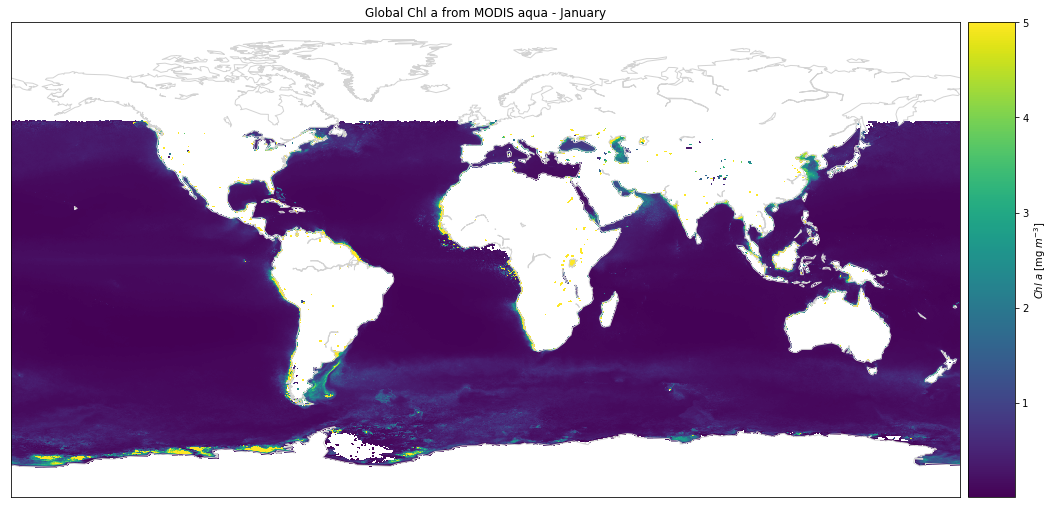

In [20]:
fig = plt.figure(figsize=(18, 16), edgecolor='w')
m = Basemap(projection='cyl',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
#m.shadedrelief(scale=0.5)

cmap='viridis'
vmin=np.nanmin(chla) 
vmax=5

m.pcolormesh(Lons, Lats, chla[0], latlon=True, cmap=cmap, vmin=vmin, vmax=vmax)

#lat = 50
#lon = -70
#x,y = m(lon, lat)
#m.plot(x, y, 'bo', markersize=24)

m.drawcoastlines(color='lightgray')

norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

sm = cm.ScalarMappable(norm=norm, cmap=cmap)

#sm.set_array([]) # can be an empty list, only needed for matplotlib < 3.1
# ...
m.colorbar(sm, pad=0.1, label='$Chl$ $a$ [mg $m^{-3}$]')
plt.title('Global Chl a from MODIS aqua - January')

In [21]:
fig.savefig('PLOTS_01/01_ChlA_MODIS_January.png')

In [89]:
x = pd.DataFrame(chlor_a[0])

#x.plot.hist(grid=True, bins=20, rwidth=0.9,color='#607c8e')

In [ ]:
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(x)

In [34]:
plt.rcParams.update({'font.size': 22})

In [46]:
def plotglobalMODIS(Lons=Lons,Lats=Lats,var=chla, data='ChlA' ,title='Global Chlorophyll a',unit='$Chl$ $a$ [mg $m^{-3}$]' ,month='July'):
    fig = plt.figure(figsize=(18, 16), edgecolor='w')
    m = Basemap(projection='cyl',
                llcrnrlat=-90, urcrnrlat=90,
                llcrnrlon=-180, urcrnrlon=180, )
    #m.shadedrelief(scale=0.5)


    cmap='viridis'
    
    vmin=np.nanmin(var) 
    
    if data == 'ChlA':
        vmax=5
    else:
        vmax = np.nanmax(var)
    
    if month == 'January':
        varplot = var[0]
    elif month == 'July':
        varplot = var[6]
    else:
        raise('wrong month supplied, try "January" or "July"')

    m.pcolormesh(Lons, Lats, varplot, latlon=True, cmap=cmap, vmin=vmin, vmax=vmax)

    #lat = 50
    #lon = -70
    #x,y = m(lon, lat)
    #m.plot(x, y, 'bo', markersize=24)

    m.drawcoastlines(color='lightgray')

    norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

    sm = cm.ScalarMappable(norm=norm, cmap=cmap)
    
    m.colorbar(sm, pad=0.1, label=unit)

    plt.title(title + ' - ' + month + '\n $_{from}$ $_{MODIS}$ $_{aqua}$ $_{satellite}$ $_{data}$')
    print('plotready')
    fig.savefig('PLOTS_01/' + data + '_MODIS_' + month +'.png', dpi=600)
    print('plotsaved')

# GLOBAL CHLOROPHYLL

/Users/bpo/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


plotready
plotsaved


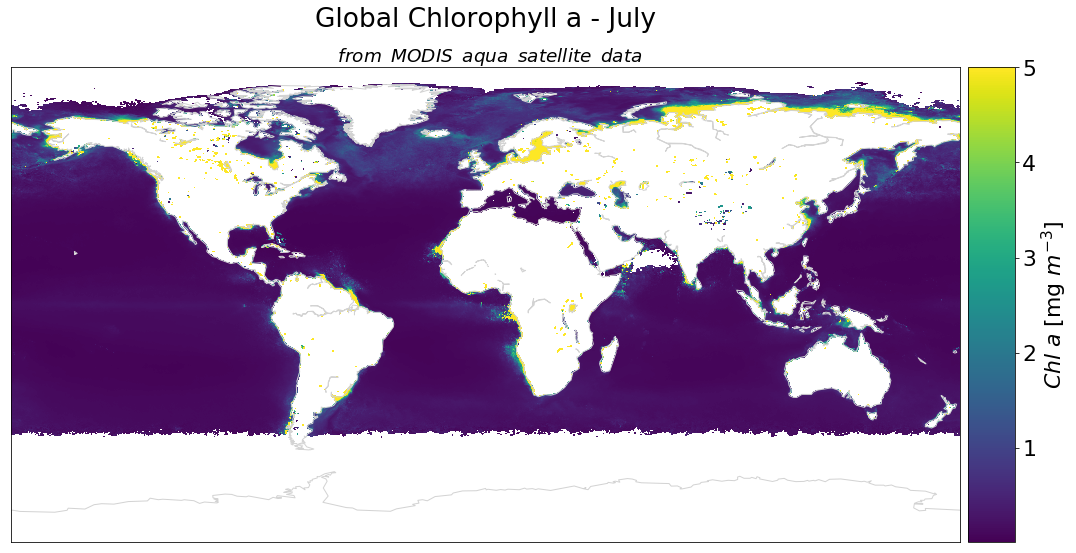

In [47]:
plotglobalMODIS()

/Users/bpo/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


plotready
plotsaved


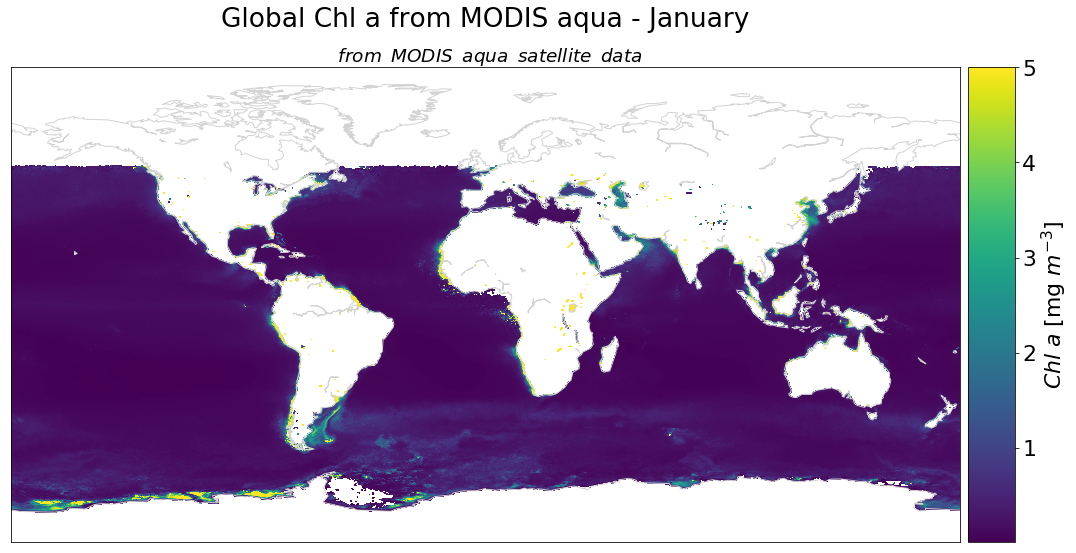

In [48]:
plotglobalMODIS(Lons=Lons,Lats=Lats,var=chla, data='ChlA' ,title='Global Chl a from MODIS aqua',unit='$Chl$ $a$ [mg $m^{-3}$]' ,month='January')

# GLOBAL PAR

/Users/bpo/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


plotready
plotsaved


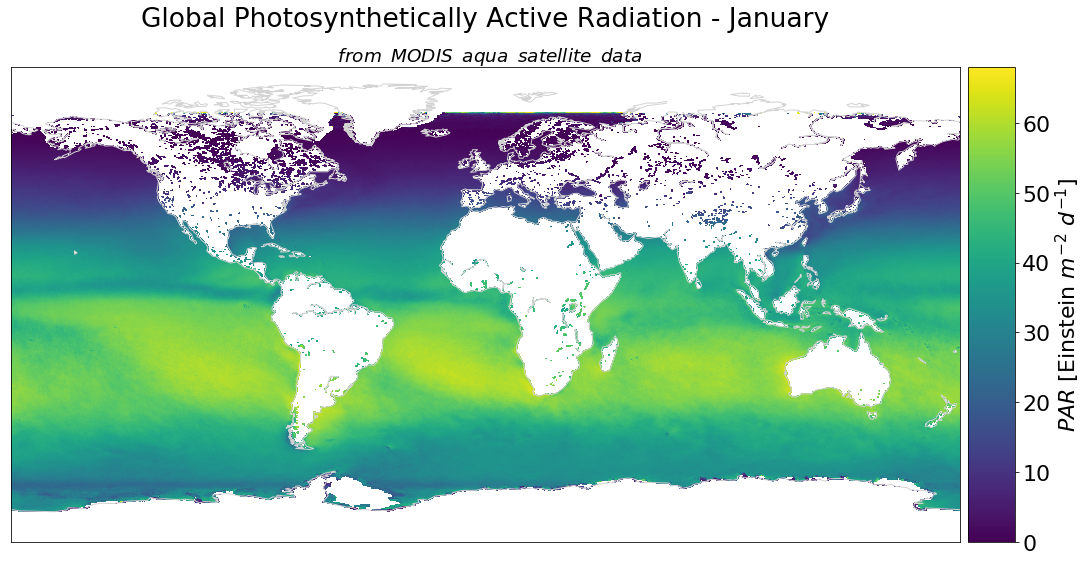

In [49]:
plotglobalMODIS(Lons=Lons,Lats=Lats,var=PAR, data='PAR' ,title='Global Photosynthetically Active Radiation',unit='$PAR$ [Einstein $m^{-2}$ $d^{-1}$]' ,month='January')

/Users/bpo/anaconda/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  """


plotready
plotsaved


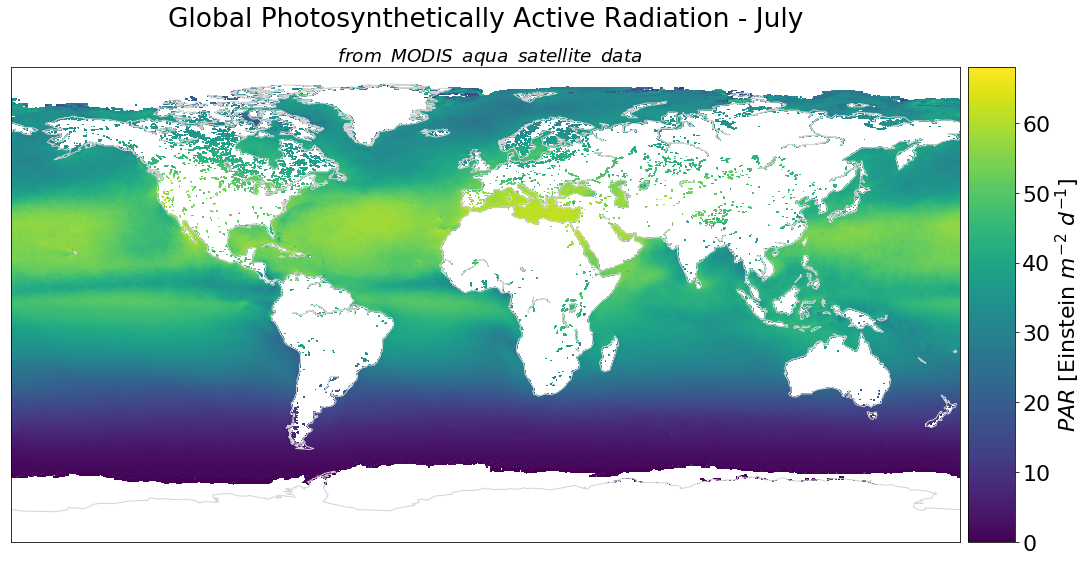

In [50]:
plotglobalMODIS(Lons=Lons,Lats=Lats,var=PAR, data='PAR' ,title='Global Photosynthetically Active Radiation',unit='$PAR$ [Einstein $m^{-2}$ $d^{-1}$]' ,month='July')